In [133]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv("NYC_Jobs.csv")
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,591279,HUMAN RIGHTS COMMISSION,Internal,1,Human Rights Community Coordinator,COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,Constituent Services & Community Programs Poli...,...,NaN,For City employees: Go to Employee Self-Servic...,"HOURS/SHIFT: DAY, 11:00AM-7:00PM (TUESDAY-SATU...","25 Chapel Street, Brooklyn, NY",NaN,New York City residency is generally required ...,07/21/2023,NaN,08/31/2023,10/03/2023
1,590597,DEPT OF ENVIRONMENT PROTECTION,External,1,EEO Investigator Specialist,AGENCY ATTORNEY,Non-Competitive-5,30087,01,Legal Affairs,...,Driver License Requirement: At the time of app...,Click on âApply Nowâ and submit a resume a...,35 hours per week,"59-17 Junction Blvd, Corona NY",NaN,New York City residency is not required for th...,07/14/2023,NaN,07/14/2023,10/03/2023
2,601877,DEPT OF DESIGN & CONSTRUCTION,External,2,Design Engineer,ASSISTANT CIVIL ENGINEER,Competitive-1,20210,00,"Engineering, Architecture, & Planning",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,30-30 Thomson Ave L I City Qns,NaN,New York City Residency is not required for th...,09/08/2023,NaN,09/13/2023,10/03/2023
3,587413,DEPT OF HEALTH/MENTAL HYGIENE,Internal,18,Criminalist II,CRIMINALIST,Non-Competitive-5,21849,02,Health,...,QUALIFICATION REQUIREMENTS A baccalaureate deg...,"TO APPLY, PLEASE SUBMIT RESUME AND COVER LETTE...",NaN,NaN,NaN,New York City Residency is not required for th...,05/18/2023,NaN,05/18/2023,10/03/2023
4,591446,NYC HOUSING AUTHORITY,External,1,RESIDENT BUILDING SUPERINTENDENT (HA),RESIDENT BUILDING SUPERINTENDE,Competitive-1,80310,00,Administration & Human Resources Building Oper...,...,1.\tFor NYCHA employees: this position is open...,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,09/25/2023,15-OCT-2023,09/25/2023,10/03/2023


In [135]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

In [136]:
df.nunique()

Job ID                           3427
Agency                             61
Posting Type                        2
# Of Positions                     31
Business Title                   2404
Civil Service Title               438
Title Classification                6
Title Code No                     471
Level                              18
Job Category                      203
Full-Time/Part-Time indicator       2
Career Level                        5
Salary Range From                 654
Salary Range To                   911
Salary Frequency                    3
Work Location                     358
Division/Work Unit               1029
Job Description                  3264
Minimum Qual Requirements         512
Preferred Skills                 2369
Additional Information           1155
To Apply                         1956
Hours/Shift                       395
Work Location 1                   370
Recruitment Contact                 0
Residency Requirement              96
Posting Date

In [137]:
df.isna().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator     270
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          50
Preferred Skills                 1214
Additional Information           1726
To Apply                            8
Hours/Shift                      4377
Work Location 1                  3985
Recruitment Contact              6743
Residency Requirement               0
Posting Date

In [138]:
# Отбрасываем лишние столбцы
col=['Job Category','Hours/Shift','Work Location 1','Civil Service Title','Title Code No','Title Classification','Division/Work Unit','Job Description','Minimum Qual Requirements','Preferred Skills','Additional Information','To Apply','Recruitment Contact','Residency Requirement','Post Until','Posting Updated','Process Date']
df.drop(columns=col, inplace=True)
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Level,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Posting Date
0,591279,HUMAN RIGHTS COMMISSION,Internal,1,Human Rights Community Coordinator,00,F,Experienced (non-manager),59116.0,74000.0,Annual,"25 Chapel St, Brooklyn Ny",07/21/2023
1,590597,DEPT OF ENVIRONMENT PROTECTION,External,1,EEO Investigator Specialist,01,F,Experienced (non-manager),63228.0,82000.0,Annual,59-17 Junction Blvd Corona Ny,07/14/2023
2,601877,DEPT OF DESIGN & CONSTRUCTION,External,2,Design Engineer,00,F,Experienced (non-manager),62370.0,71726.0,Annual,30-30 Thomson Ave L I City Qns,09/08/2023
3,587413,DEPT OF HEALTH/MENTAL HYGIENE,Internal,18,Criminalist II,02,F,Experienced (non-manager),76872.0,76872.0,Annual,421 East 26th Street NY NY,05/18/2023
4,591446,NYC HOUSING AUTHORITY,External,1,RESIDENT BUILDING SUPERINTENDENT (HA),00,F,Experienced (non-manager),60171.0,93630.0,Annual,Castle Hill Houses,09/25/2023


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743 entries, 0 to 6742
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         6743 non-null   int64  
 1   Agency                         6743 non-null   object 
 2   Posting Type                   6743 non-null   object 
 3   # Of Positions                 6743 non-null   int64  
 4   Business Title                 6743 non-null   object 
 5   Level                          6743 non-null   object 
 6   Full-Time/Part-Time indicator  6473 non-null   object 
 7   Career Level                   6743 non-null   object 
 8   Salary Range From              6743 non-null   float64
 9   Salary Range To                6743 non-null   float64
 10  Salary Frequency               6743 non-null   object 
 11  Work Location                  6743 non-null   object 
 12  Posting Date                   6743 non-null   o

In [140]:
df.dtypes

Job ID                             int64
Agency                            object
Posting Type                      object
# Of Positions                     int64
Business Title                    object
Level                             object
Full-Time/Part-Time indicator     object
Career Level                      object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Posting Date                      object
dtype: object

In [141]:
df.rename(columns={'# Of Positions': 'Number Of Positions'}, inplace=True)

In [142]:
df.dtypes

Job ID                             int64
Agency                            object
Posting Type                      object
Number Of Positions                int64
Business Title                    object
Level                             object
Full-Time/Part-Time indicator     object
Career Level                      object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Posting Date                      object
dtype: object

In [143]:
df['Full-Time/Part-Time indicator'].unique()

array(['F', 'P', nan], dtype=object)

In [144]:
df['Full-Time/Part-Time indicator'].value_counts()

Full-Time/Part-Time indicator
F    6127
P     346
Name: count, dtype: int64

In [145]:
df['Full-Time/Part-Time indicator'] = df['Full-Time/Part-Time indicator'].fillna('F')

In [146]:
df.head()

,Job ID,Agency,Posting Type,Number Of Positions,Business Title,Level,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Posting Date
0,591279,HUMAN RIGHTS COMMISSION,Internal,1,Human Rights Community Coordinator,00,F,Experienced (non-manager),59116.0,74000.0,Annual,"25 Chapel St, Brooklyn Ny",07/21/2023
1,590597,DEPT OF ENVIRONMENT PROTECTION,External,1,EEO Investigator Specialist,01,F,Experienced (non-manager),63228.0,82000.0,Annual,59-17 Junction Blvd Corona Ny,07/14/2023
2,601877,DEPT OF DESIGN & CONSTRUCTION,External,2,Design Engineer,00,F,Experienced (non-manager),62370.0,71726.0,Annual,30-30 Thomson Ave L I City Qns,09/08/2023
3,587413,DEPT OF HEALTH/MENTAL HYGIENE,Internal,18,Criminalist II,02,F,Experienced (non-manager),76872.0,76872.0,Annual,421 East 26th Street NY NY,05/18/2023
4,591446,NYC HOUSING AUTHORITY,External,1,RESIDENT BUILDING SUPERINTENDENT (HA),00,F,Experienced (non-manager),60171.0,93630.0,Annual,Castle Hill Houses,09/25/2023


In [147]:
df.isna().sum()

Job ID                           0
Agency                           0
Posting Type                     0
Number Of Positions              0
Business Title                   0
Level                            0
Full-Time/Part-Time indicator    0
Career Level                     0
Salary Range From                0
Salary Range To                  0
Salary Frequency                 0
Work Location                    0
Posting Date                     0
dtype: int64

In [148]:
df.describe()

,Job ID,Number Of Positions,Salary Range From,Salary Range To
count,6743.000000,6743.000000,6743.000000,6743.000000
mean,584314.214445,1.895447,62360.933664,86561.177788
std,22937.486305,5.192402,30694.464854,45216.945911
min,468473.000000,1.000000,0.000000,15.000000
25%,577145.000000,1.000000,51345.000000,63351.000000
50%,591165.000000,1.000000,60718.000000,84000.000000
75%,600559.000000,1.000000,79620.000000,109990.000000
max,609285.000000,150.000000,231796.000000,252165.000000


In [149]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', 'Number Of Positions',
       'Business Title', 'Level', 'Full-Time/Part-Time indicator',
       'Career Level', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Posting Date'],
      dtype='object')

In [150]:
top10_agency=df['Agency'].value_counts().reset_index()
top10_agency=top10_agency.head(10)
top10_agency

,Agency,count
0,DEPT OF HEALTH/MENTAL HYGIENE,1214
1,DEPT OF ENVIRONMENT PROTECTION,920
2,HRA/DEPT OF SOCIAL SERVICES,645
3,DEPARTMENT OF TRANSPORTATION,492
4,DEPT OF DESIGN & CONSTRUCTION,372
5,NYC HOUSING AUTHORITY,363
6,ADMIN FOR CHILDREN'S SVCS,241
7,DEPARTMENT OF CORRECTION,195
8,LAW DEPARTMENT,186
9,TAXI & LIMOUSINE COMMISSION,155


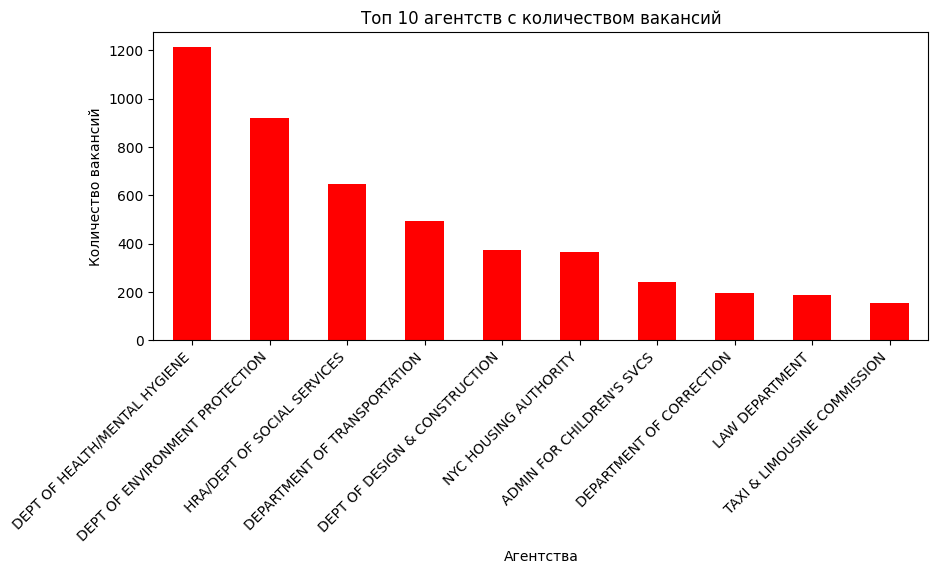

In [151]:
top_agency = df['Agency'].value_counts().nlargest(10)

# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 4))
top_agency.plot(kind='bar', color='red')
plt.title('Топ 10 агентств с количеством вакансий')
plt.xlabel('Агентства')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')  # Поворачиваем названия агентств для лучшей читаемости
plt.show()

In [152]:
posting_type=df['Posting Type'].value_counts().reset_index()
posting_type

,Posting Type,count
0,Internal,3488
1,External,3255


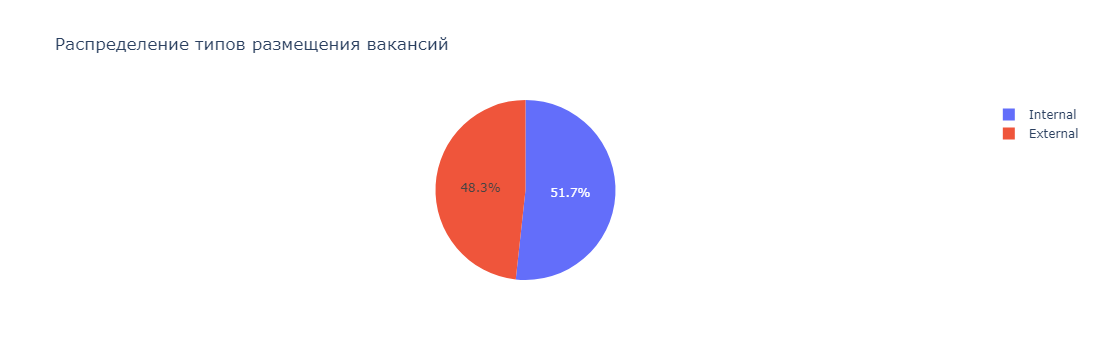

In [153]:
fig = px.pie(posting_type, values='count', names='Posting Type',title='Распределение типов размещения вакансий')
fig.show()

In [154]:
n_position=df['Number Of Positions'].value_counts().reset_index()
n_position=n_position.head(5)
n_position

,Number Of Positions,count
0,1,5559
1,2,497
2,3,206
3,4,95
4,5,91


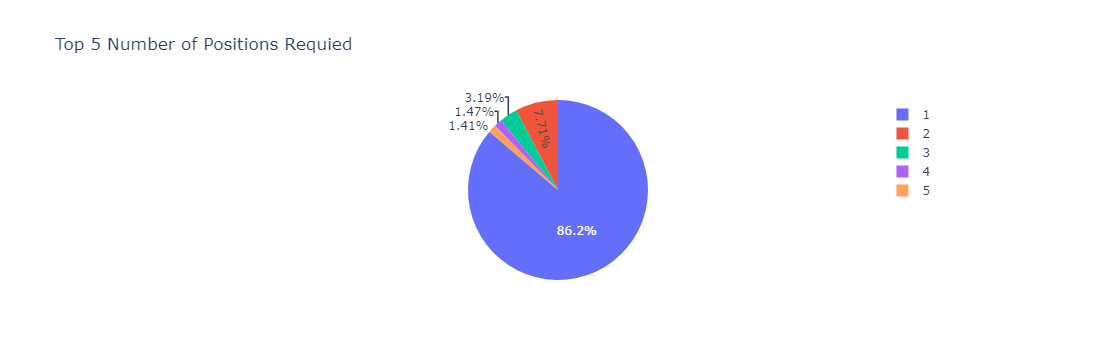

In [155]:
fig = px.pie(n_position, values='count', names='Number Of Positions',title='Top 5 Number of Positions Requied ')
fig.show()


In [156]:
top20_Business_Title=df['Business Title'].value_counts().reset_index()
top20_Business_Title=top20_Business_Title.head(20)
top20_Business_Title

,Business Title,count
0,Project Manager,62
1,Deputy Director,54
2,ACCOUNTABLE MANAGER,48
3,Senior Project Manager,31
4,CASE MANAGEMENT TEAM LEADER,30
5,CASE MANAGEMENT SUPERVISOR,28
6,College Aide,27
7,Assistant General Counsel,26
8,Program Manager,23
9,Assistant Civil Engineer,22


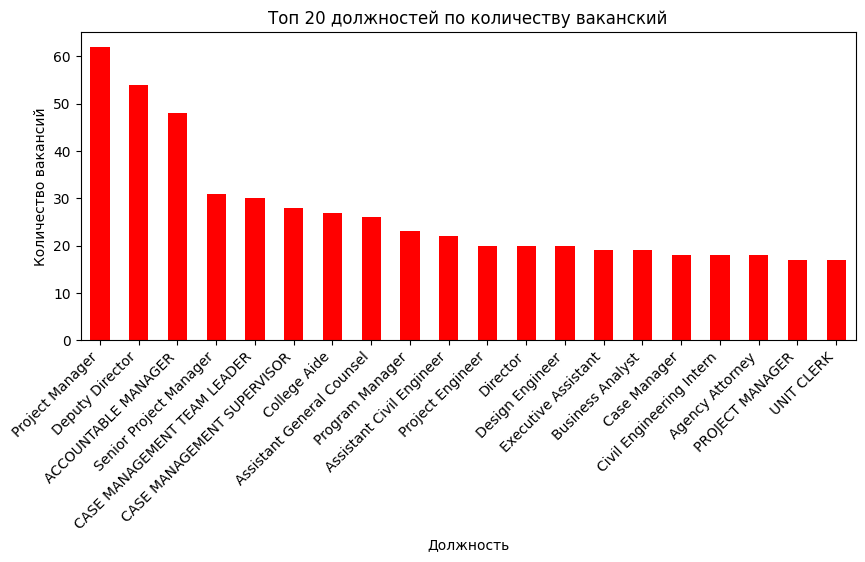

In [157]:
# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 4))
top_business_titles.plot(kind='bar', color='red')
plt.title('Топ 20 должностей по количеству ваканский')
plt.xlabel('Должность')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')  # Поворачиваем названия должностей для лучшей читаемости
plt.show()


In [158]:
career_level=df['Career Level'].value_counts().reset_index()
career_level

,Career Level,count
0,Experienced (non-manager),5160
1,Entry-Level,683
2,Manager,634
3,Student,153
4,Executive,113


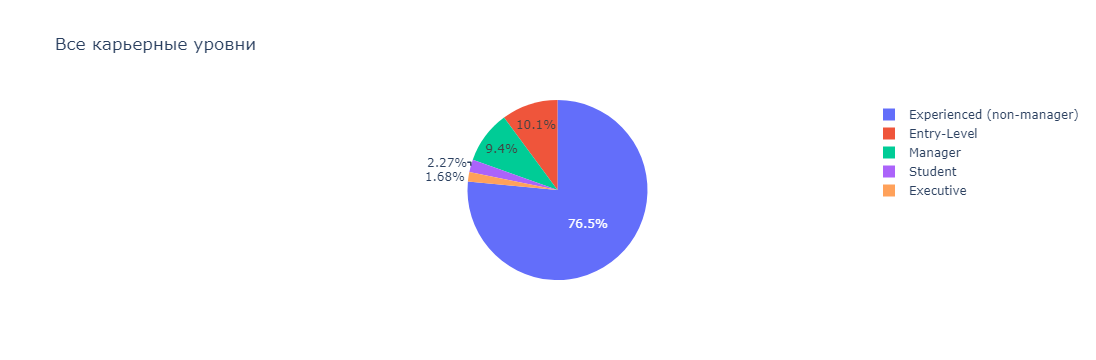

In [159]:
fig = px.pie(career_level, values='count', names='Career Level',title='Все карьерные уровни')
fig.show()

In [160]:
Salary_Frequency=df['Salary Frequency'].value_counts().reset_index()
Salary_Frequency

,Salary Frequency,count
0,Annual,6118
1,Hourly,554
2,Daily,71


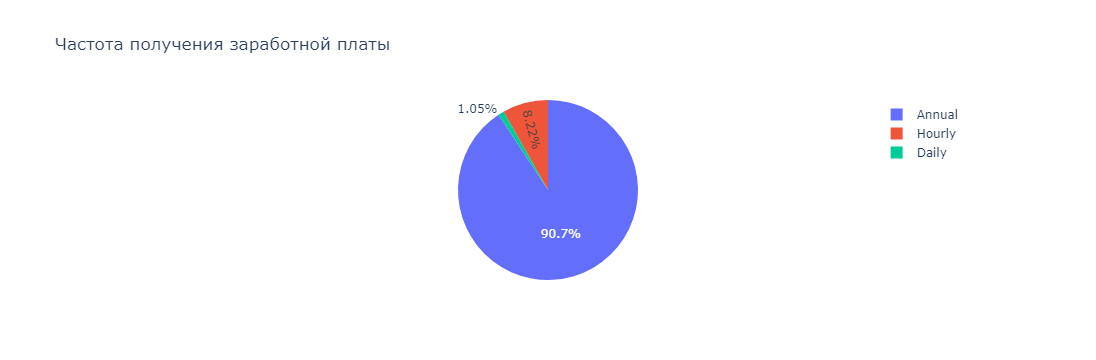

In [161]:
fig = px.pie(Salary_Frequency, values='count', names='Salary Frequency',title='Частота получения заработной платы')
fig.show()

In [162]:
top5_Work_Location=df['Work Location'].value_counts().reset_index()
top5_Work_Location=top5_Work_Location.head(5)
top5_Work_Location

,Work Location,count
0,42-09 28th Street,570
1,55 Water St Ny Ny,419
2,96-05 Horace Harding Expway,382
3,30-30 Thomson Ave L I City Qns,370
4,59-17 Junction Blvd Corona Ny,277


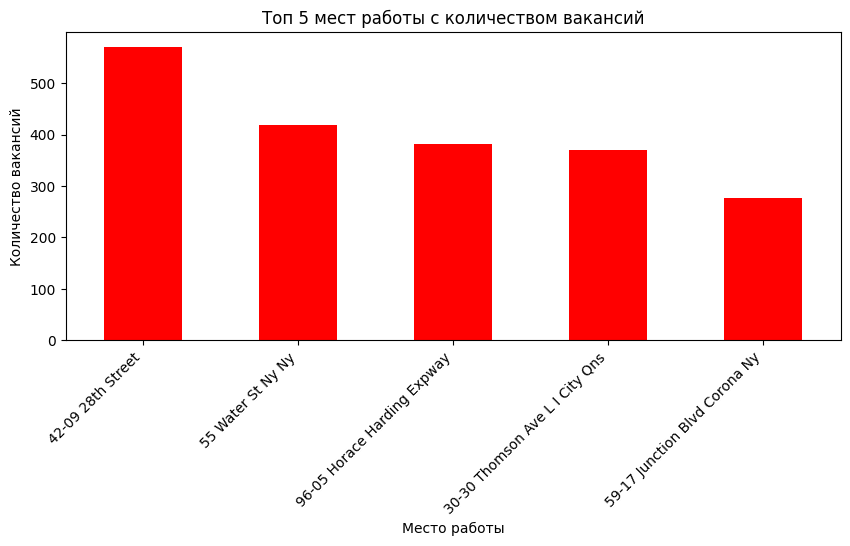

In [163]:
# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 4))
top_work_locations.plot(kind='bar', color='red')
plt.title('Топ 5 мест работы с количеством вакансий')
plt.xlabel('Место работы')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')  # Поворачиваем названия мест работы для лучшей читаемости
plt.show()


In [164]:
tiem_indicator=df['Full-Time/Part-Time indicator'].value_counts().reset_index()
tiem_indicator

,Full-Time/Part-Time indicator,count
0,F,6397
1,P,346


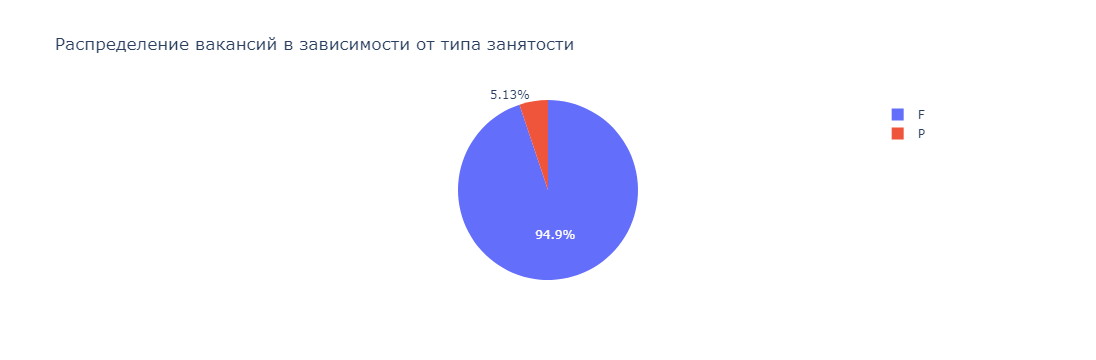

In [165]:
fig = px.pie(tiem_indicator, values='count', names='Full-Time/Part-Time indicator',title='Распределение вакансий в зависимости от типа занятости')
fig.show()

In [166]:
data=df.groupby('Business Title')['Career Level'].value_counts().reset_index()
data=data.sort_values(by='count',ascending=False).head(30)
data

,Business Title,Career Level,count
897,Deputy Director,Experienced (non-manager),52
1888,Project Manager,Experienced (non-manager),50
3,ACCOUNTABLE MANAGER,Experienced (non-manager),44
417,CASE MANAGEMENT TEAM LEADER,Experienced (non-manager),30
2246,Senior Project Manager,Experienced (non-manager),29
416,CASE MANAGEMENT SUPERVISOR,Experienced (non-manager),28
620,College Aide,Student,27
265,Assistant General Counsel,Experienced (non-manager),24
1860,Program Manager,Experienced (non-manager),20
945,Design Engineer,Experienced (non-manager),20


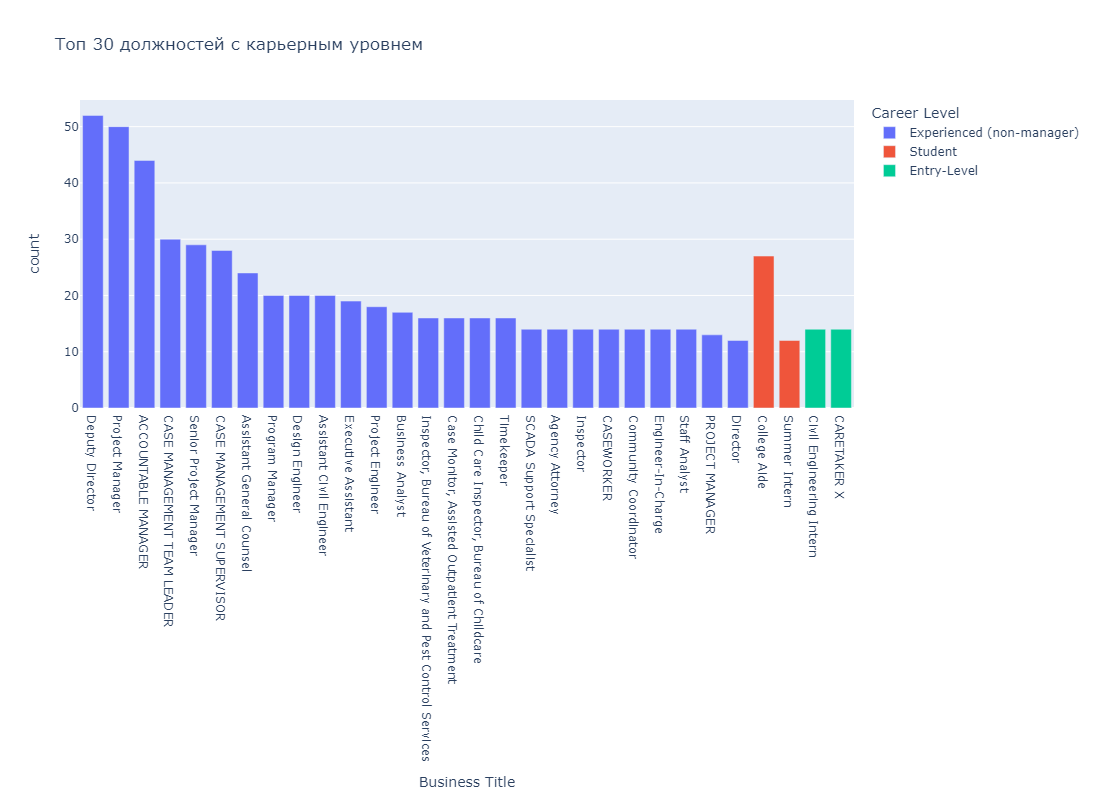

In [167]:
fig=px.bar(data,x='Business Title',y='count',color='Career Level',width=1100, height=800,title='Топ 30 должностей с карьерным уровнем')
fig.show()

In [168]:
df_Salary_Frequency=df.groupby(['Career Level'])['Salary Frequency'].value_counts().reset_index()
df_Salary_Frequency=df_Salary_Frequency.sort_values(by='count',ascending=False).head(30)
df_Salary_Frequency

,Career Level,Salary Frequency,count
4,Experienced (non-manager),Annual,4796
7,Manager,Annual,630
0,Entry-Level,Annual,577
5,Experienced (non-manager),Hourly,301
9,Student,Hourly,151
3,Executive,Annual,113
1,Entry-Level,Hourly,98
6,Experienced (non-manager),Daily,63
2,Entry-Level,Daily,8
8,Manager,Hourly,4


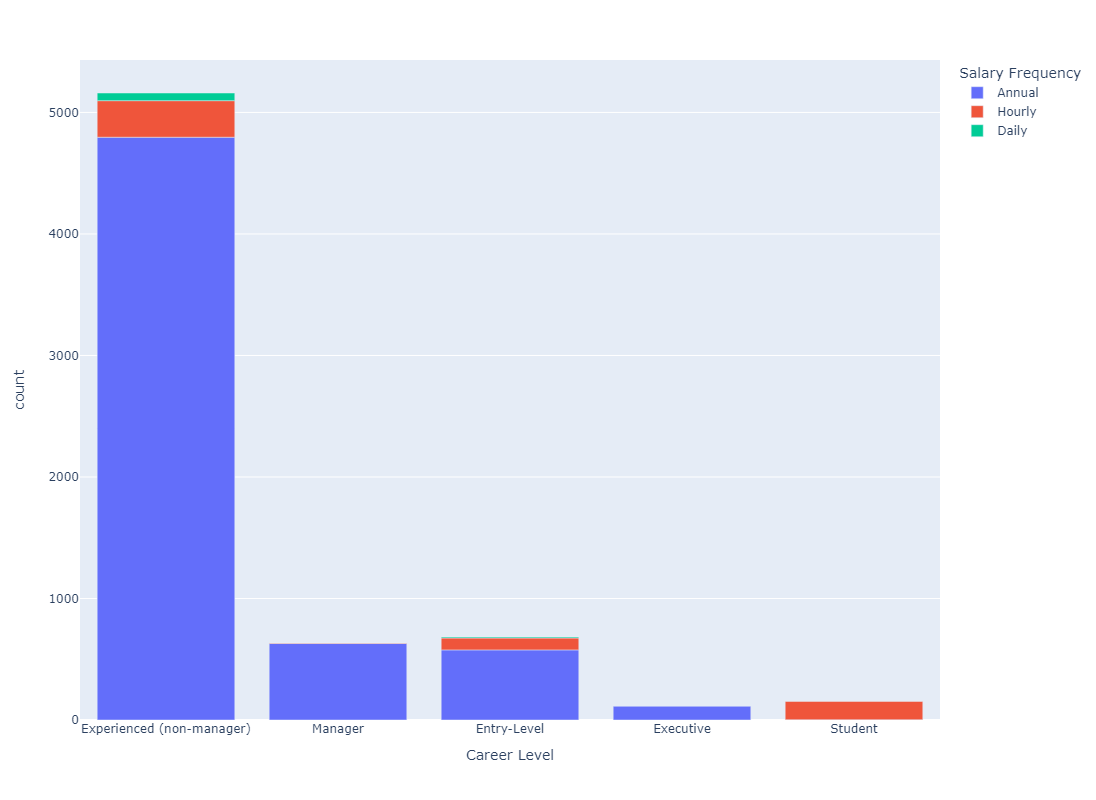

In [169]:
fig=px.bar(df_Salary_Frequency,x='Career Level',y='count',color='Salary Frequency',width=1100, height=800)
fig.show()

In [170]:
df_tiem_indicator=df.groupby(['Career Level'])['Full-Time/Part-Time indicator'].value_counts().reset_index()
df_tiem_indicator=df_tiem_indicator.sort_values(by='count',ascending=False).head(30)
df_tiem_indicator

,Career Level,Full-Time/Part-Time indicator,count
3,Experienced (non-manager),F,4973
5,Manager,F,632
0,Entry-Level,F,629
4,Experienced (non-manager),P,187
2,Executive,F,113
7,Student,P,103
1,Entry-Level,P,54
8,Student,F,50
6,Manager,P,2


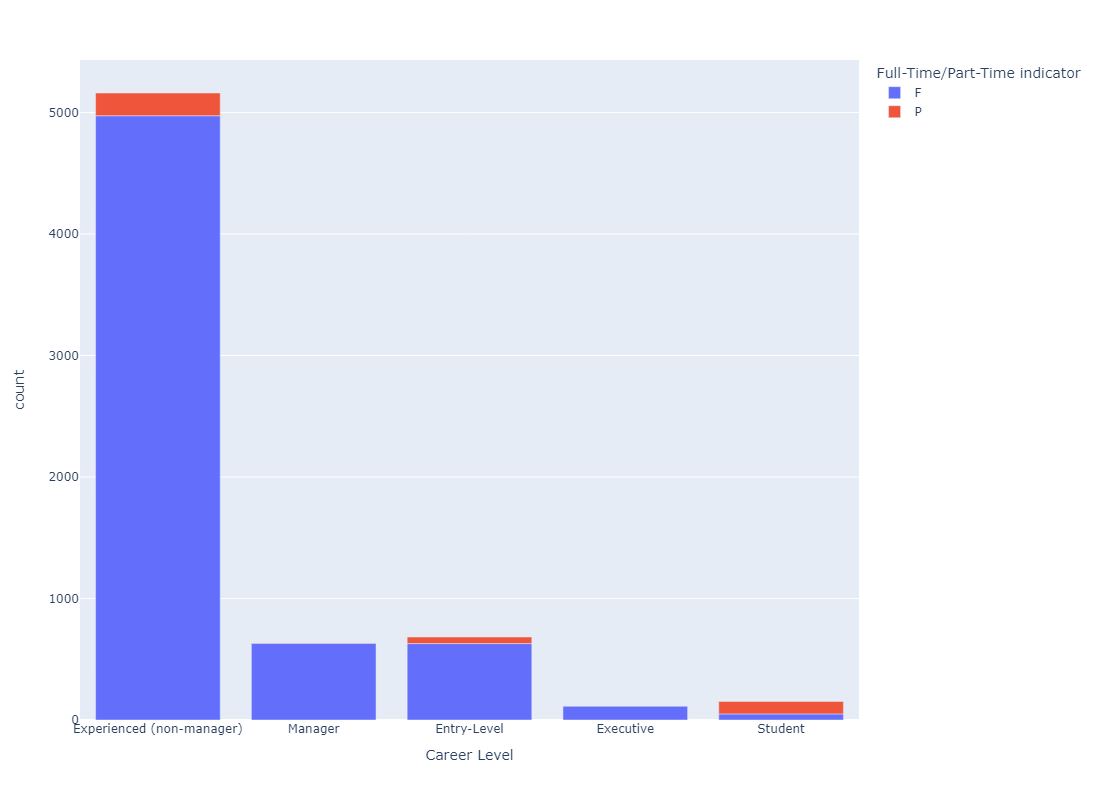

In [171]:
fig=px.bar(df_tiem_indicator,x='Career Level',y='count',color='Full-Time/Part-Time indicator',width=1100, height=800)
fig.show()